In [1]:
import pandas as pd
from iexfinance.stocks import Stock
from datetime import datetime
import matplotlib.pyplot as plt
from iexfinance.stocks import get_historical_data
import os
import requests
import env
import iexfinance as iex

In [ ]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
df.to_csv('S&P500-Info.csv')
df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])

In [ ]:
sp = pd.read_csv('S&P500-Symbols.csv', index_col=[0])

In [ ]:
sp.info()

In [ ]:
def getCompanyInfo(symbols):
    stock_batch = Stock(symbols,
                        token=env.token)
    company_info = stock_batch.get_company()
    return company_info

In [15]:
start = datetime(2017,12,31)
end = datetime(2021,1,29)

In [16]:
def getHistoricalPrices(stock):
    return get_historical_data(stock, start, end, 
                               output_format='pandas', 
                               token=env.token)

In [17]:
nio = getHistoricalPrices('NIO')

In [18]:
nio.T

,2018-09-12,2018-09-13,2018-09-14,2018-09-17,2018-09-18,2018-09-19,2018-09-20,2018-09-21,2018-09-24,2018-09-25,...,2021-01-15,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29
close,6.6,11.6,9.9,8.5,7.68,8.5,8.78,8.59,7.87,7.58,...,56.27,58.44,57.71,58.34,61.95,59.99,60.31,57.15,58.37,57
high,6.93,12.69,13.8,9.75,9.1,9.15,9.47,9.07,8.39,8.19,...,60.22,59.005,60.09,58.58,62.17,64.52,60.67,59.79,59.46,60.71
low,5.35,6.52,9.22,8.5,7.67,7.54,8.4151,8.5,7.85,7.5,...,55.67,56.41,56.19,55.88,58.32,58.35,58.64,56.6,55.15,56.44
open,6,6.62,12.66,9.61,8.73,7.88,9.07,9.05,8.32,8.06,...,59.84,58.21,59.85,57.02,58.95,64.05,60.04,57.95,56.76,59.03
symbol,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,...,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO
volume,66848996,158346488,172473559,56323875,41827593,48306520,40275036,15118471,16297902,18909287,...,132247850,99561083,94983634,73119519,133918072,111986446,70393251,73078254,73955136,78678189
id,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES,...,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES,HISTORICAL_PRICES
key,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,...,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO,NIO
subkey,,,,,,,,,,,...,,,,,,,,,,
updated,1606830572000,1606830572000,1606830572000,1606830572000,1606830572000,1606830572000,1606830572000,1606830572000,1606830572000,1606830572000,...,1610763379000,1611108974000,1611195382000,1611281777000,1611368176000,1611625700000,1611712086000,1611798493000,1611890175000,1611972970000


In [19]:
round(nio.volume.mean(),0)

67313199.0

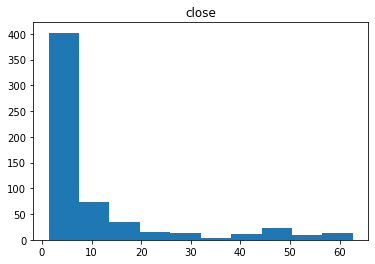

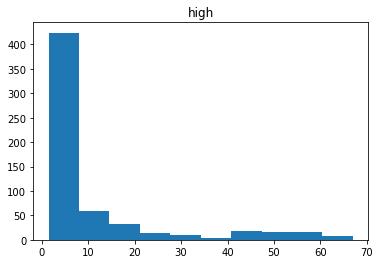

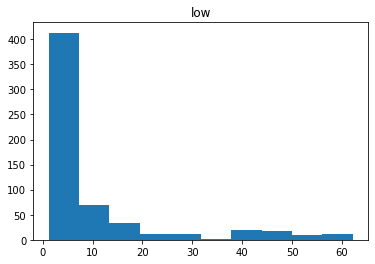

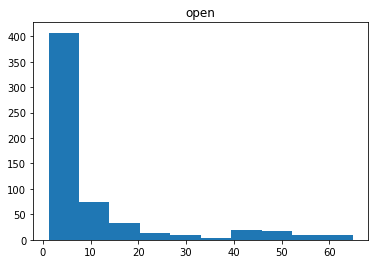

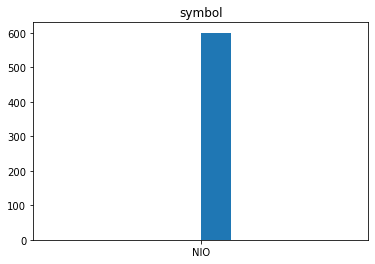

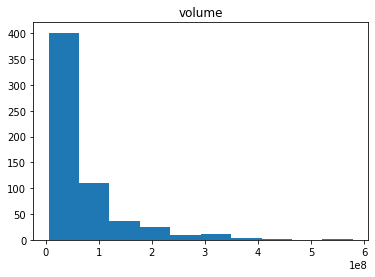

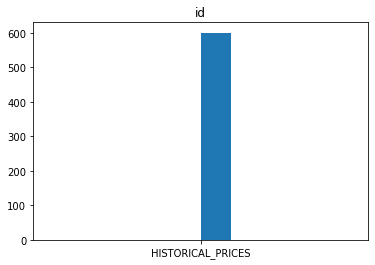

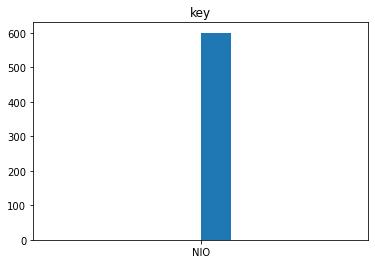

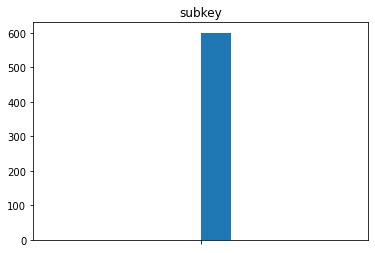

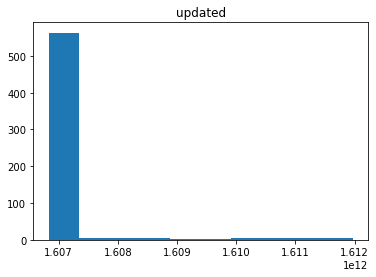

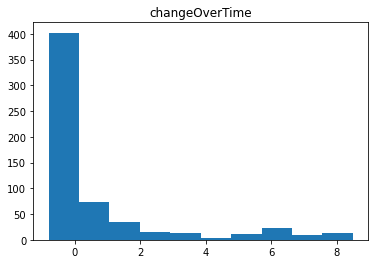

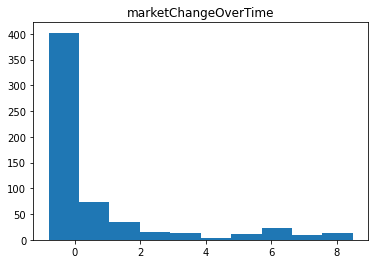

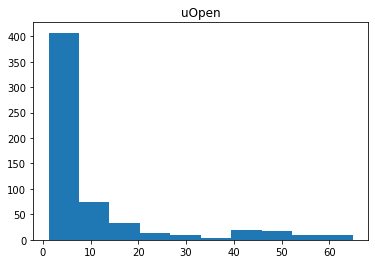

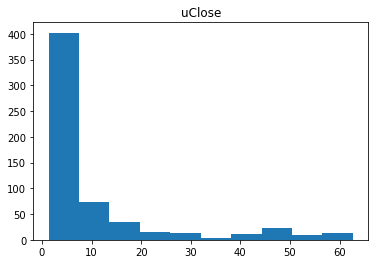

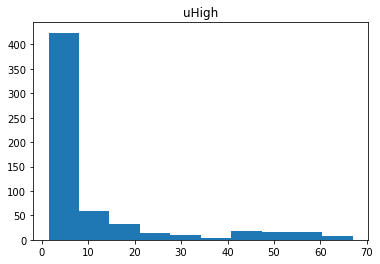

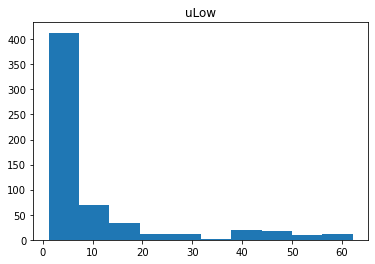

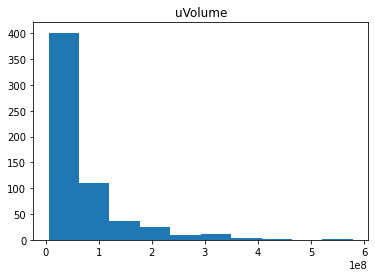

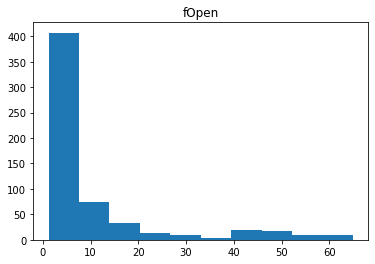

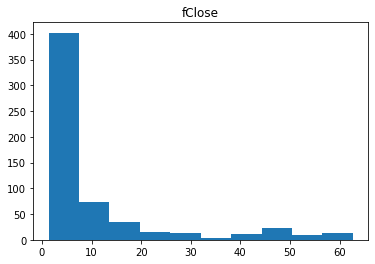

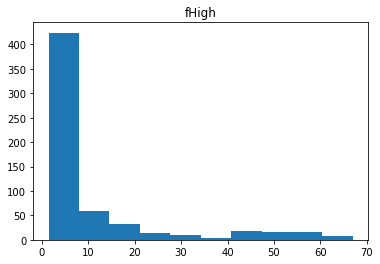

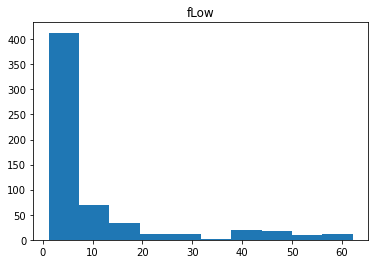

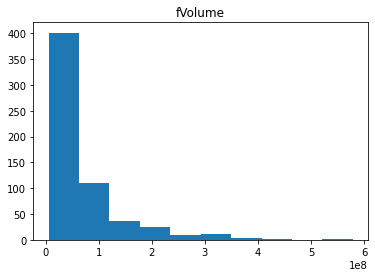

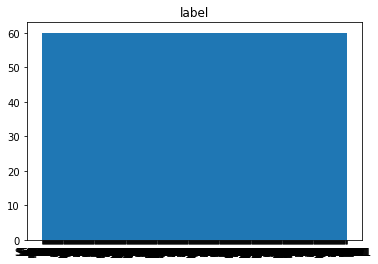

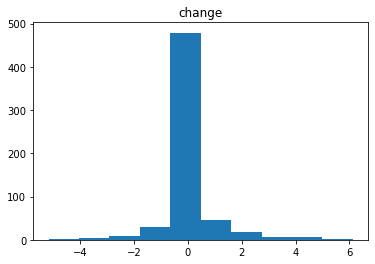

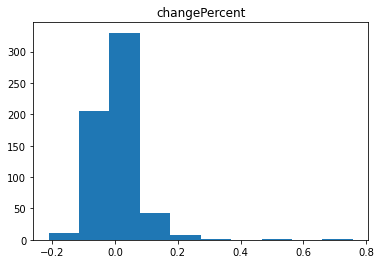

In [28]:
for col in nio.columns:
    plt.hist(nio[col])
    plt.title(col)
    plt.show()

<AxesSubplot:>

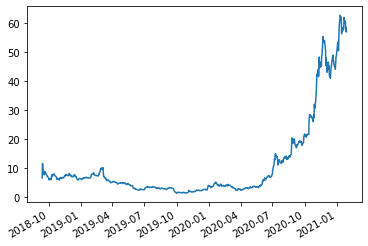

In [20]:
nio.close.plot()

<AxesSubplot:>

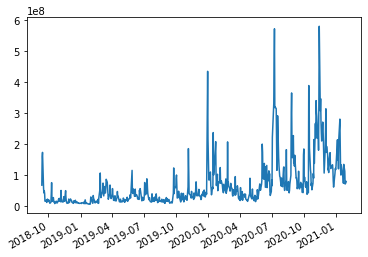

In [21]:
nio.volume.plot()

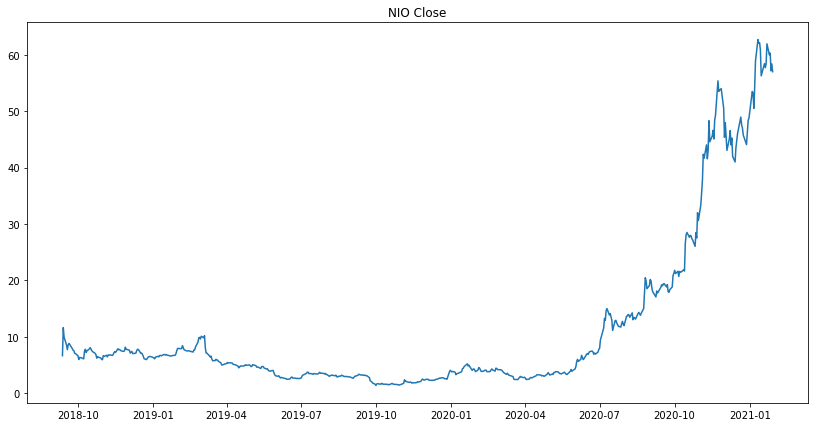

In [29]:
plt.figure(figsize = (14, 7))
plt.plot(nio.index, nio['close'])
plt.title("NIO Close")
plt.show()